In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = "/home/gustavo/fastai/beija_flores2/fotos/"

In [7]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs, valid_pct = 0.1                              
                                  ).normalize(imagenet_stats)

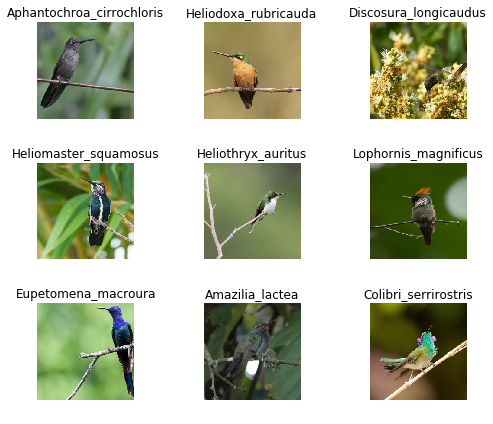

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.901574,1.451703,0.383161,01:29
1,1.342591,1.057432,0.287906,01:28
2,1.152583,0.929192,0.251516,01:30
3,1.043205,0.906131,0.241527,01:28


In [11]:
learn.save('stage-1')

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


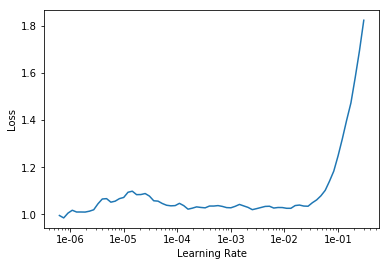

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.908176,0.719109,0.198002,01:36
1,0.607017,0.565769,0.158045,01:35


In [15]:
learn.save('stage-2')

In [27]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (25230 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Chlorestes_notata,Chlorestes_notata,Chlorestes_notata,Chlorestes_notata,Chlorestes_notata
Path: /home/gustavo/fastai/beija_flores2/fotos;

Valid: LabelList (2803 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Chlorostilbon_lucidus,Hylocharis_cyanus,Topaza_pella,Lophornis_chalybeus,Florisuga_fusca
Path: /home/gustavo/fastai/beija_flores2/fotos;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.766213,0.526678,0.145915,01:33
1,0.511770,0.396013,0.108098,01:31


In [29]:
learn.save('stage-3')

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.629779,0.492748,0.142347,01:32
1,0.451865,0.388197,0.108812,01:32


In [31]:
learn.save("stage-3")

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.412157,0.480138,0.131288,01:30
1,0.552007,0.504420,0.136639,01:29
2,0.420783,0.435106,0.120585,01:29
3,0.258556,0.392200,0.108098,01:29
4,0.186543,0.383390,0.103104,01:29


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


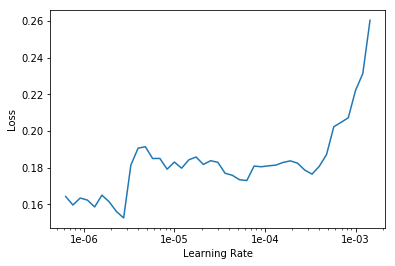

In [33]:
learn.lr_find()
learn.recorder.plot()